A depressão é um transtorno mental grave que afeta milhões de pessoas em todo o mundo. Seus sintomas incluem tristeza profunda, sensação de vazio, ansiedade, distúrbios do sono e perda de interesse por atividades diárias. Além disso, pode causar sentimentos de culpa, baixa energia, dificuldade de concentração e, em casos mais graves, pensamentos suicidas e sintomas psicóticos.

A gravidade da depressão varia conforme o número e a intensidade dos sintomas, além do impacto na vida social e profissional da pessoa. A depressão também pode ocorrer dentro do Transtorno Bipolar, uma condição psiquiátrica em que há episódios de mania — períodos de euforia, impulsividade, excesso de energia e redução da necessidade de sono. A principal diferença entre os dois transtornos é justamente a presença desses episódios maníacos no transtorno bipolar.

Tanto a depressão quanto o transtorno bipolar possuem influência genética, mas fatores ambientais podem desencadear ou agravar os sintomas. Mudanças na luz do dia, alterações no ritmo social (como trabalho em turnos ou viagens frequentes), estilo de vida desregulado e eventos de vida estressantes podem contribuir para o surgimento da depressão. Além disso, problemas de saúde, efeitos colaterais de medicamentos e o abuso de álcool e substâncias também estão relacionados ao desenvolvimento da doença.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Peguei os dados no kaggle https://www.kaggle.com/datasets/arashnic/the-depression-dataset?resource=download

In [2]:
# Lendo o arquivo CSV
df = pd.read_csv('scores.csv')

# Mostrando as primeiras linhas do arquivo
print(df.head())

        number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0  


In [23]:
#Contabilizando linhas
df.count()

number       55
days         55
gender       55
age          55
afftype      23
melanch      20
inpatient    23
edu          53
marriage     23
work         23
madrs1       23
madrs2       23
dtype: int64

In [24]:
# Verificando dados duplicados
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [25]:
# Contando vazios novamente
print(df.isnull().sum())

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64


In [26]:
# Removendo vazios
df = df.dropna()
print(df.isnull().sum()) # Recontando vazios

number       0
days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
edu          0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 22
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     20 non-null     object 
 1   days       20 non-null     int64  
 2   gender     20 non-null     int64  
 3   age        20 non-null     object 
 4   afftype    20 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  20 non-null     float64
 7   edu        20 non-null     object 
 8   marriage   20 non-null     float64
 9   work       20 non-null     float64
 10  madrs1     20 non-null     float64
 11  madrs2     20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.0+ KB


In [28]:
df.groupby("days").size()



days
7     1
9     1
11    1
12    1
13    9
14    4
16    2
18    1
dtype: int64

In [29]:
# Criando um DataFrame de exemplo
np.random.seed(42)
data = pd.DataFrame({
    "days": np.random.randint(5, 30, 50),
    "gender": np.random.choice([1, 2], 50),  # 1 = Masculino, 2 = Feminino (exemplo)
    "age": np.random.randint(18, 70, 50),
    "afftype": np.random.choice([1.0, 2.0, np.nan], 50),
    "melanch": np.random.choice([1.0, 2.0, np.nan], 50),
    "inpatient": np.random.choice([1.0, 2.0, np.nan], 50),
    "edu": np.random.randint(6, 20, 50),  # Anos de educação
    "marriage": np.random.choice([1.0, 2.0, np.nan], 50),
    "work": np.random.choice([1.0, 2.0, np.nan], 50),
    "madrs1": np.random.randint(10, 40, 50),
    "madrs2": np.random.randint(5, 35, 50),
})

# Criando a figura
fig = go.Figure()

fig.add_trace(go.Box(y=data["days"], name="Days"))
fig.add_trace(go.Box(y=data["gender"], name="Gender"))
fig.add_trace(go.Box(y=data["age"], name="Age"))
fig.add_trace(go.Box(y=data["afftype"], name="Afftype"))
fig.add_trace(go.Box(y=data["melanch"], name="Melanch"))
fig.add_trace(go.Box(y=data["inpatient"], name="Inpatient"))
fig.add_trace(go.Box(y=data["edu"], name="Education"))
fig.add_trace(go.Box(y=data["marriage"], name="Marriage"))
fig.add_trace(go.Box(y=data["work"], name="Work"))
fig.add_trace(go.Box(y=data["madrs1"], name="MADRS1"))
fig.add_trace(go.Box(y=data["madrs2"], name="MADRS2"))

# Mostrar o gráfico corretamente no Google Colab
fig.show(renderer="colab")


In [30]:
df[df["days"] > 10]


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0
13,condition_14,14,1,60-64,1.0,2.0,2.0,6-10,2.0,2.0,28.0,19.0
14,condition_15,13,2,55-59,2.0,2.0,2.0,11-15,1.0,1.0,14.0,18.0


Conclusão
O dataset contém informações valiosas sobre depressão e fatores associados.
Existem alguns dados ausentes que precisam ser tratados.
Podemos explorar a relação entre educação, internação, trabalho e melhora nos sintomas.
Algumas pessoas melhoraram, enquanto outras mantiveram ou pioraram seus escores MADRS.

1.Coluna|	Descrição, 
2.number|	Identificador do paciente (ex: condition_1, condition_2, etc.)
3.days|	Número de dias de medição
4.gender|	Gênero (1 = masculino, 2 = feminino)
5.age|	Faixa etária do paciente (ex: 35-39, 40-44, etc.)
6.afftype|	Tipo de transtorno afetivo (1 = bipolar II, 2 = depressão unipolar|, 3 = bipolar I)
7.melanch	Presença de melancolia (1 = sim, 2 = não)
8.inpatient|	Internação (1 = internado, 2 = ambulatorial)
9.edu	Nível| de educação (agrupado em anos: 6-10, 11-15, 16-20)
10.marriage|	Estado civil (1 = casado/coabitando, 2 = solteiro)
11.work|	Situação profissional (1 = trabalhando/estudando, 2 = desempregado/licença/pensão
12.madrs1|	Pontuação MADRS no início da medição
13.madrs2|	Pontuação MADRS no final da medição













In [31]:
fig = px.scatter(data, x="madrs1", y="age", color='gender', title="madrs1 to age ratio by gender")

# Mostrar o gráfico corretamente no Google Colab
fig.show(renderer="colab")


In [32]:
fig = px.scatter(data, x="madrs2", y="age", color='gender', title="madrs1 to age ratio by gender")

# Mostrar o gráfico corretamente no Google Colab
fig.show(renderer="colab")


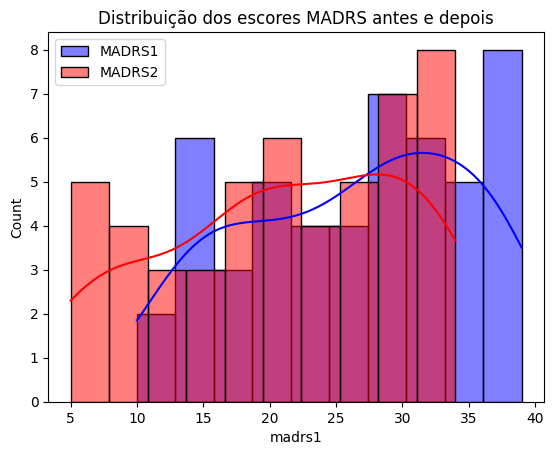

In [33]:
sns.histplot(data["madrs1"], kde=True, bins=10, color="blue", label="MADRS1")
sns.histplot(data["madrs2"], kde=True, bins=10, color="red", label="MADRS2")
plt.legend()
plt.title("Distribuição dos escores MADRS antes e depois")
plt.show()


Os escores MADRS1 (azul) têm uma distribuição mais concentrada entre 20 e 40, com muitos valores altos, indicando que a maioria dos pacientes começou com níveis significativos de depressão.
Os escores MADRS2 (vermelho) estão mais espalhados e deslocados para valores mais baixos (entre 5 e 30), sugerindo uma redução nos sintomas de depressão após o tratamento.
A curva KDE (linha suave) também mostra essa tendência:
O pico de MADRS1 está mais à direita (escores altos).
O pico de MADRS2 está mais à esquerda (escores mais baixos), indicando uma melhora geral.
Ainda há uma sobreposição considerável entre MADRS1 e MADRS2, o que sugere que alguns pacientes podem ter mostrado pouca ou nenhuma melhora.

Conclusão
Há uma tendência geral de redução nos escores de depressão após o tratamento, visto que a distribuição de MADRS2 está mais à esquerda.
Nem todos os pacientes melhoraram igualmente, pois ainda há valores altos em MADRS2.
O tratamento parece ter sido eficaz para a maioria, mas seria interessante analisar quais fatores influenciam a melhora (exemplo: idade, internação, tipo de transtorno, etc.).

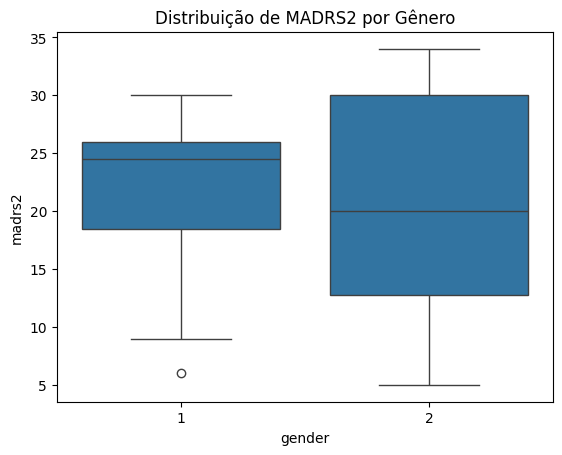

In [34]:
sns.boxplot(x="gender", y="madrs2", data=data)
plt.title("Distribuição de MADRS2 por Gênero")
plt.show()


🔹 Médianas:

O grupo 1 apresenta uma mediana em torno de 25.
O grupo 2 tem uma mediana menor, em torno de 20.
🔹 Intervalo Interquartil (IQR - dispersão dos dados):

O grupo 1 tem uma distribuição mais concentrada, com uma faixa interquartil entre aproximadamente 18 e 28.
O grupo 2 tem uma maior variabilidade, com a distribuição entre 10 e 30, indicando que os escores nesse grupo variam mais.
🔹 Outliers:

Há um outlier no grupo 1 (um paciente com um escore muito baixo).
O grupo 2 tem uma amplitude maior, mas sem valores extremos evidentes.


Conclusão
O grupo 2 teve uma maior redução nos escores MADRS2, indicando uma possível melhora mais significativa no tratamento.
A variação no grupo 2 foi maior, sugerindo que o impacto do tratamento pode ter sido mais heterogêneo entre os indivíduos desse grupo.
O grupo 1 manteve escores médios mais altos, o que pode indicar que esse grupo respondeu menos ao tratamento.

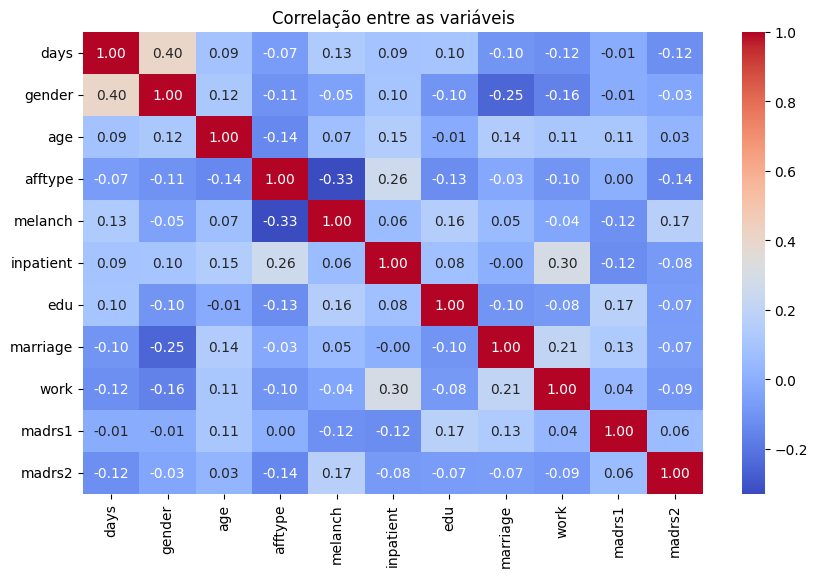

In [35]:
correlation = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as variáveis")
plt.show()


Interpretação das Correlações
O heatmap mostra a correlação entre as variáveis, com valores entre -1 e 1:

Valores próximos de 1 indicam forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar).
Valores próximos de -1 indicam forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).
Valores próximos de 0 indicam ausência de correlação.
Aqui estão algumas observações relevantes:

🔹 Correlação mais forte (+ e -)
"gender" e "days" (0.40) → Indica que o gênero pode estar relacionado ao tempo de tratamento. Isso pode sugerir que um gênero passa mais dias em tratamento que o outro.
"afftype" e "melanch" (-0.33) → Indica que há uma tendência negativa entre o tipo de transtorno afetivo e a presença de melancolia. Isso pode indicar que determinados transtornos afetivos têm menor relação com melancolia.
"work" e "inpatient" (0.30) → Sugere que a condição de trabalho pode estar relacionada com internação, possivelmente porque pacientes internados estão mais propensos a estarem afastados do trabalho.
🔹 Correlação com MADRS (depressão)
"madrs1" e "edu" (0.17) → Indica que o nível educacional pode ter uma leve influência nos escores de depressão.
"madrs1" e "melanch" (-0.12) → Pequena correlação negativa, sugerindo que a melancolia pode impactar levemente os escores iniciais de depressão.
"madrs2" e "melanch" (0.17) → Sugere que a melancolia pode estar associada a uma pontuação final mais alta de depressão.
"madrs1" e "inpatient" (-0.12) → Pode indicar que pacientes internados têm uma leve tendência a pontuações menores no MADRS inicial, talvez devido à intervenção precoce.


Conclusão
As correlações não são muito fortes, mas algumas tendências podem ser notadas.
Gênero parece influenciar o tempo de tratamento (days).
A relação entre transtorno afetivo e melancolia é negativa, o que pode sugerir que certos transtornos não estão fortemente ligados à melancolia.
A internação pode estar associada à situação de trabalho, possivelmente indicando que quem é internado tem mais dificuldades no ambiente de trabalho.
A presença de melancolia pode estar relacionada a escores mais altos de depressão (madrs2).
A educação tem uma leve influência nos sintomas depressivos, o que pode indicar que pessoas com maior escolaridade lidam melhor com os sintomas ou buscam mais tratamento.